Part I
---


| Var | Range | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (-2;9) | 110 | 1.25 | 4 | Скотта | t-распределение k = 7 |


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

import math

n = 110
a = -2
sigma = 9


In [19]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)




[ -2.88480474  -1.95543901  -0.44360767  -7.62971491 -14.39600616
   4.31492726  -6.76629637  -4.13765744  12.70293871   1.67024804
   7.71550407 -15.78583535 -17.79077059   4.85973684   1.67709351
  -4.26459934  -0.38269317  -1.1102185    3.63910779  -0.8394275
  14.08312478   4.89129837 -15.13568451  -0.09086816   3.16790471
   2.17429292   0.13169542 -12.55159119   4.01163165   1.13495152
  -3.66967951   0.85222245  -3.22950386 -16.61255152  -4.04805961
  10.14863565  -0.10798788  -4.52099251   6.45592336   2.12285313
  -2.12298586  -3.69249486   5.12508401  -8.77874551 -13.65716122
   0.85217905  -0.15733971  -1.30790952  -2.85839178  -8.57388729
   5.39191915  -3.66991812   6.07603456   6.11311762   2.79332312
  -4.7180631    2.9194405    8.30570491 -14.00412618 -13.72092807
  -7.85482383  -2.30004419  11.493866     0.61213222  -8.88361724
 -12.20769724  -8.75453681  28.15982303  -5.450418    -7.00039876
  21.64913714   5.70781633  14.90658992   3.24839367   4.48127677
   2.923288

In [23]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = math.floor(sample.min())
max_smpl = math.ceil(sample.max())
h = (max_smpl-min_smpl)/n_intervals

print(n_intervals, min_smpl, max_smpl, h)


8 -21 29 6.25


In [27]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)


1 interval: -21.0 - -14.75
2 interval: -14.75 - -8.5
3 interval: -8.5 - -2.25
4 interval: -2.25 - 4.0
5 interval: 4.0 - 10.25
6 interval: 10.25 - 16.5
7 interval: 16.5 - 22.75
8 interval: 22.75 - 29.0


In [85]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма относительных частот - {(frequency/n).sum()}')
# frequency = frequency/n
# print(frequency)



1 interval: 6
2 interval: 15
3 interval: 28
4 interval: 36
5 interval: 17
6 interval: 5
7 interval: 2
8 interval: 1

Сумма относительных частот - 1.0


In [88]:
tmp = frequency/h
for i in range(0, len(tmp)):
    print(f'{i+1} interval: {tmp[i]}')
print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.96
2 interval: 2.4
3 interval: 4.48
4 interval: 5.76
5 interval: 2.72
6 interval: 0.8
7 interval: 0.32
8 interval: 0.16
17.6


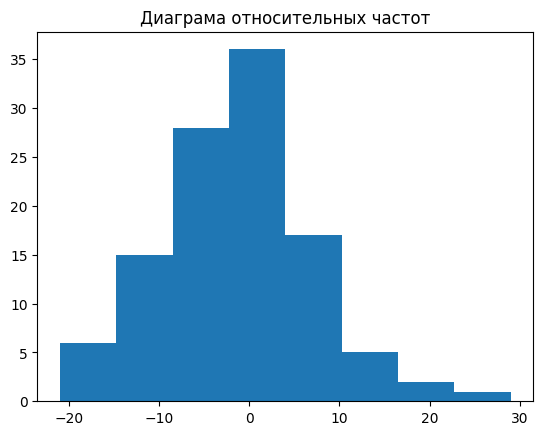

In [86]:
plt.title("Диаграма относительных частот")
plt.stairs(frequency, intervals, fill=True)


Part II
---
